# Erkennen (Klassifizieren) von handschriftlichen Ziffern mit DeepLearning
Eines der ersten, äusserst erfolgreichen Einsätze von DeepLearning war die Erkennung von handgeschriebenen Ziffern. Diese Machine-Vision Lösung hat die Post weltweit revolutioniert, denn damit konnte die Sortierung von Briefen automatisiert werden. Die Sendungen konnten durch das Erkennen der Postleitzahlen automatisch an den richtigen Ort ausgeliefert werden.

## MNIST

Die MNIST-Datenbank (Modified National Institute of Standards and Technology database) ist eine große Datenbank mit handgeschriebenen Ziffern. Wie das folgende Beispielbild zeigt, entspricht die Schreibweise der Ziffern in diesem Datensatz der nordamerikanischen Schreibkultur.
<img src="https://gitlab.com/fhgr/DeepLearning/-/raw/main/_mnist_example_.png" alt="Example images of handwritten digits" />

## Lernziele:
Die Teilnehmenden sind in der Lage
* Bilddaten für das Training mit Tensorflow aufzubereiten
* Labeldaten für das Training mit Tensorflow aufzubereiten
* ein Neuronalen Netzes *from scratch*, d.h. Layer für Layer zu erstellen
* ein neuronales Netzes mit Tensorflow für eine einfache Klassifikationsaufgabe zu trainieren
* den Trainingserfolg zu bestimmen und zu bewerten
* Hyperparameter des Neuronalen Netzes zu optimieren
* das eingelernte Netzwerks anhand des Test-Sets zu evaluieren, d.h. die Qualität des Netzes zu beurteilen

## Inhalt:
1. [Umgebung definieren](#Umgebung)
2. [Daten aufbereiten](#Daten)
  * [Daten aufteilen in Trainings- und Testdaten](#Split)
  * [Daten als Input für das neuronale Netz umformen](#Input)
3. [Neuronales Netz erstellen](#NeuronalesNetz)
4. [Training des Neuronalen Netzes](#Training)
5. [Trainingserfolg anhand des Validation-Set bestimmen](#Trainingserfolg)
6. [Abschliessende Evaluation der Performance auf dem Test-Set](#Evaluation)

#### Helper-Functions für dieses interactive Tutorial
Mit den in Zelle "In [1]" angegebenen Funktionen werden interaktive Fragen eingeblendet. Sie sind nicht für das Verständnis notwendig, und können übersprungen werden.

In [1]:
from IPython.display import display
import ipywidgets as widgets
import functools
import urllib.parse

def urlcode(text, offset=12, encode=True):
    if encode:
        return(urllib.parse.quote(''.join([chr(ord(ch)+offset) for ch in text])))
    else:
        return(''.join([chr(ord(ch)+offset) for ch in urllib.parse.unquote(text)]))
    
def showSolution(arg,text="button has been clicked!",offset=-12):
    print(urlcode(text, offset, encode=False))
    
def Question(frage, text=None):
    if text is None:
        text = frage;
        frage = 'Antwort anzeigen'
    button_download = widgets.Button(description = frage)   
    button_download.on_click(functools.partial(showSolution, text=text))
    display(button_download)
    
print(urlcode('some garbled text.'))

%7F%7Byq%2Csm~nxqp%2C%C2%80q%C2%84%C2%80%3A


## <a name="Umgebung"></a>1. Umgebung vorbereiten
Wir werden für unser DeepLearning Tutorial tensorflow verwenden. Um uns nicht zu sehr auf den Syntax von Tensorflow festzulegen, nutzen wir die DeepLearning-Umgebung Keras. Diese kann ausser Tensorflow auch andere DeepLearning-Umgebungen (sogenannte Backends) benutzen.

In [2]:
import tensorflow
print("tensorflow version={}".format(tensorflow.__version__))
import keras
print("keras version={}".format(keras.__version__))

tensorflow version=2.3.1
keras version=2.4.3


In [3]:
# Definiere einen Seed um stets dieselben Zufallszahlen zu erhalten

seed = 0

## 2. <a name="Daten"></a>Daten aufbereiten

### <a name="Split"></a>Daten herunterladen und aufteilen in Trainings- und Testdaten

In [4]:
# Downloaden des MNIST Datensatzes
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Trainingsdaten aufteilen in (kleines) Training-Set und Validation-Set
from sklearn.model_selection import train_test_split
train_images_partial, validation_images, train_labels_partial, validation_labels = \
    train_test_split(train_images, train_labels, test_size=0.2, random_state=seed)

Zeige die Grössen der einzelnen Datensätze:

(Technisch gesprochen handelt es sich dabei um Tensoren, also salopp gesagt um Matrizen, welche mehr als zwei Dimensionen aufweisen.)

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images_partial.shape

(48000, 28, 28)

In [7]:
validation_images.shape

(12000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

**Frage:** Was bedeuten die hier gezeigten Werte? Wie kommen sie zustande?

In [9]:
# Diese Zelle muss zuerst ausgeführt werden, bevor die Lösung angezeigt werden kann:
Question('Puq%2Cq~%7F%C2%80q%2Cfmtx%2Csun%C2%80%2Cvq%C2%83qux%7F%2Cpuq%2CMz%C2%86mtx%2CNuxpq~%2Cuy%2CPm%C2%80qz%7Fm%C2%80%C2%86%2Cmz%3A%16Puq%2Cfmtxqz%2C%3E%2C%C2%81zp%2C%3F%2C4%3ED8%2C%3ED5%2Csqnqz%2Cpuq%2CNuxps~%C4%82%7F%7Fq%2C4uz%2C%5Cu%C2%84qx5%2Cmz%3A')

Button(description='Antwort anzeigen', style=ButtonStyle())

### Beispiel: Anzeige eines Bildes mit einer handschriftlichen Ziffer
Eine bestimmte Ziffer kann mit dem unten angegebenen Code angezeigt werden:  
(Falls die Ziffer nicht angezeigt wird, den untenstehenden Code-Block ein zweites Mal ausführen.)

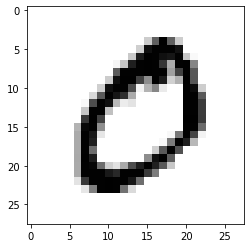

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def show_image(img):
    plt.imshow(img.flatten().reshape(28,-1), cmap=plt.cm.binary)
    plt.show()
    
index = 1
show_image(train_images[index])

**Aufgabe:** Lassen Sie sich unterschiedliche Ziffern anzeigen um ein Gefühl für deren Aussehen zu erhalten.  
**Frage:** Was muss ich dazu tun?

In [11]:
# Diese Zelle muss zuerst ausgeführt werden, bevor die Lösung angezeigt werden kann:
Question('Pqz%2Ccq~%C2%80%2Cuz%2Cpq~%2Cfquxq%2C.uzpq%C2%84%2CI%2C%3D.%2C%C2%82%7Bz%2C%3D%2Cm%C2%81r%2Cquzqz%2Cmzpq~qz%2Cfmtxqz%C2%83q~%C2%80%2C%C3%B0zpq~z%3A')

Button(description='Antwort anzeigen', style=ButtonStyle())

In [12]:
train_images[index].flatten().shape

(784,)

**Frage:** Was gibt die obige Zahl an?

In [13]:
# Diese Zelle muss zuerst ausgeführt werden, bevor die Lösung angezeigt werden kann:
Question('CD%40%2Cu%7F%C2%80%2Cpuq%2CSq%7Fmy%C2%80%C2%86mtx%2Cpq~%2C%5Cu%C2%84qx%2Cuz%2Cvqpqy%2Cpq~%2CNuxpq~%2Cpq%7F%2CYZU_%60%2CPm%C2%80qz%7Fm%C2%80%C2%86q%7F%3A')

Button(description='Antwort anzeigen', style=ButtonStyle())

### <a name="Input"></a>Daten als Input für das neuronale Netz umformen
Zum Trainieren des neuronalen Netzes müssen sowohl die Bilddaten als auch die Labeldaten umgewandelt werden.
#### Bilddaten linearisieren
Ein neuronales Netz arbeitet mit einer Anzahl an Eingangsneuronen. Diese sind allerdings linear angeordnet (und nicht als 2D Matrix). Als Input in unser neuronales Netz benötigen wir also eindimensionale Vektoren der Länge 784 (= 28 * 28). Um diese zu erhalten müssen wir die bestehenden Pixelwerte neu anordnen (`reshape()`).

In [14]:
# Bildhöhe und -breite bestimmen
(image_width, image_height) = train_images.shape[1:]

# Anzahl Pixel pro Bild berechnen
num_pixels = image_width * image_height

# Datensätze umformen
train_images = train_images.reshape((-1, num_pixels)) # -1 bedeutet: dieser Wert soll automatisch bestimmt werden
train_images_partial = train_images_partial.reshape((-1, num_pixels))
validation_images = validation_images.reshape((-1, num_pixels))
test_images = test_images.reshape((-1, num_pixels))

print(test_images.dtype)

uint8


#### Bilddaten in Gleitkommazahlen umwandeln
Die Bilddaten sind vom Datentyp uint8. Damit lässt sich in neuronalen Netzen nicht rechnen. Die Pixelwerte müssen in 32-bit Float umgewandelt und in den Bereich [0,1] eingepasst werden. Siehe https://en.wikipedia.org/wiki/Feature_scaling

In [15]:
train_images = train_images.astype('float32') / 255
train_images_partial = train_images_partial.astype('float32') / 255
validation_images = validation_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#### Labeldaten in Binär-Kategorien umwandeln
Im Folgenden schauen wir uns die Labels der Daten an. Für jede Ziffer ist ein Integer-Wert hinterlegt, welcher aussagt, welche Ziffer im Bild erkannt werden sollte.

In [16]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Diese Form der Darstellung ist nicht ideal für die Verarbeitung durch ein neuronales Netz. Stattdessen möchten wir für jedes Bild einen Vektor im sogenannt kategorischen Format haben. Das bedeutet in unserem Fall, für jedes Bild einer Ziffer gibt es einen Vektor mit 10 Bits, bei welchem exakt ein Bit gesetzt ist. Der Index (d.h. die Position) des gesetzten Bits gibt an, um welche Ziffer es sich handelt.

Beispiel: Die Ziffer 2 wird codiert als [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ]

In [17]:
from tensorflow.keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
train_labels_partial_cat = to_categorical(train_labels_partial)
validation_labels_cat = to_categorical(validation_labels)
test_labels_cat = to_categorical(test_labels)

In [18]:
train_labels_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

**Aufgabe:** Überprüfen Sie anhand einem oder zwei Fällen, ob die so erstellten Labels mit den in den Bildern sichtbaren Ziffern übereinstimmen.

In [19]:
# Geben Sie hier Ihren Code ein:


Unsere Daten sind nun bereit, als Trainingsdaten verwendet zu werden.

## 3. <a name="NeuronalesNetz"></a>Neuronales Netz erstellen

Die Architektur eines neuronalen Netzes (oder allgemein ein Machine Learning Algorithmus) bezeichnet man als Modell (engl. *model*).  
Unser Model wird aus mehreren hintereinanderliegenden Schichten (engl. *layers*) von Neuronen bestehen.  
Vielfach wird einfach eine vorgefertigte Netzwerkarchitektur geladen. In unserem Fall wird das Neuronale Netz recht einfach sein, wir wollen das gesamte Netzwerk selbst Schicht für Schicht erstellen.

In [20]:
from keras import models
from keras import layers

network = models.Sequential() # wir möchten eine Aneinanderreihung von mehreren Layern erstellen

Unser Netz soll aus zwei Layern bestehen:

- Hidden Layer: num_pixels Eingänge, 8 Neuronen/Ausgänge, ReLU Aktivierungsfunktion
- Output Layer: 10 Ausgänge (entspricht den Ziffern 0 bis 9), Softmax Aktivierungsfunktion

In [21]:
network.add(layers.Dense(8, activation='relu', input_shape=(num_pixels,)))
network.add(layers.Dense(10, activation='softmax'))
print(f'Your network now has {len(network.layers)} layer(s).')

Your network now has 2 layer(s).


**Frage:** Weshalb müssen wir die Anzahl Eingänge beim zweiten Layer nicht definieren?

In [22]:
# Diese Zelle muss zuerst ausgeführt werden, bevor die Lösung angezeigt werden kann:
Question('Puq%2CMz%C2%86mtx%2CQuzs%C3%B0zsq%2Cu%7F%C2%80%2Cp%C2%81~ot%2Cpuq%2CMz%C2%86mtx%2CM%C2%81%7Fs%C3%B0zsq%2Cpq%7F%2C%C2%82%7B~mzsqsmzsqzqz%2CXm%C2%85q~%7F%2Crq%7F%C2%80sqxqs%C2%80%3A')

Button(description='Antwort anzeigen', style=ButtonStyle())

**Aufgabe:** Suchen Sie im Internet nach dem Aussehen der Softmax Funktion

Weiter definieren wir
- einen Optimizer (also den Algorithmus, welcher nach jeder Iteration die Gewichte/Schwellwerte konkret anpasst)
- eine Loss-Funktion
- eine Metrik (hier: der Anteil korrekt zugewiesener Ziffern), welche wir zusätzlich zum Loss beobachten möchten.

In [23]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Bemerkung: Abhängig von der genauen Problemstellung haben sich bestimmte Kombinationen von Aktivierungsfunktion im letzten Layer und Loss-Funktion bewährt: (Tabelle gemäss Chollet, S. 114)

| Problemstellung | Aktivierungsfunktion im letzten Layer | Loss-Funktion |
|:-----|:---:|---|
| Binary classification | `sigmoid` | `binary_crossentropy` |
| Multiclass, single-label classification | `softmax` | `categorical_crossentropy` |
| Multiclass, multilabel classification | `sigmoid` | `binary_crossentropy` |
| Regression to arbitrary values | None | `mse` |
| Regression to values between 0 and 1 | `sigmoid` | `mse` or `binary_crossentropy` |

In unserem Fall handelt es sich um ein Klassifikationsproblem, welches *multiclass* ist (es gibt mehr als zwei Klassen, nämlich zehn), aber jedes Sample hat genau ein Label.

## 4. <a name="Training"></a>Training durchführen

Als nächsten Schritt möchten wir unser Netzwerk anhand der Trainingsdaten trainieren.  
Je nach Ausstattung des Computers kann dies einige Minuten dauern.

In [24]:
history = network.fit(train_images_partial, train_labels_partial_cat,
                      epochs=50,
                      batch_size=128,
                      validation_data=(validation_images, validation_labels_cat))

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.8891 - accuracy: 0.7374 - val_loss: 0.4927 - val_accuracy: 0.8618
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4307 - accuracy: 0.8798 - val_loss: 0.3653 - val_accuracy: 0.8960
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.9001 - val_loss: 0.3268 - val_accuracy: 0.9074
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.9073 - val_loss: 0.3059 - val_accuracy: 0.9129
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.9112 - val_loss: 0.2954 - val_accuracy: 0.9157
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3041 - accuracy: 0.9144 - val_loss: 0.2926 - val_accuracy: 0.9157
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2971 - accuracy: 0.9164 - val_loss: 0.2848 - val_accuracy: 0.9198
Epoch 

## 5. <a name="Trainingserfolg"></a>Trainingserfolg bestimmen

Wir vergleichen nun die Resultate auf dem Trainings- und dem Validation-Set.

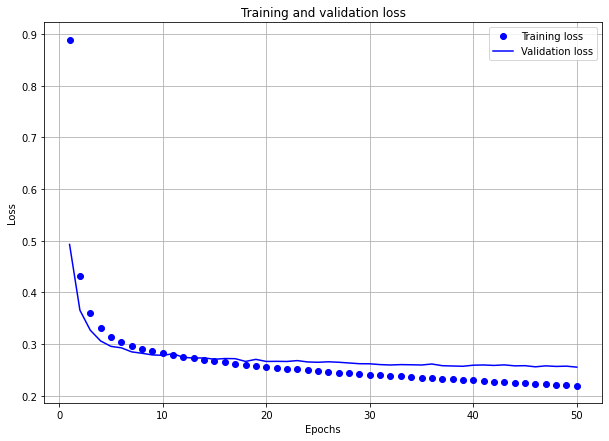

In [25]:
# Training und Validation loss anzeigen
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

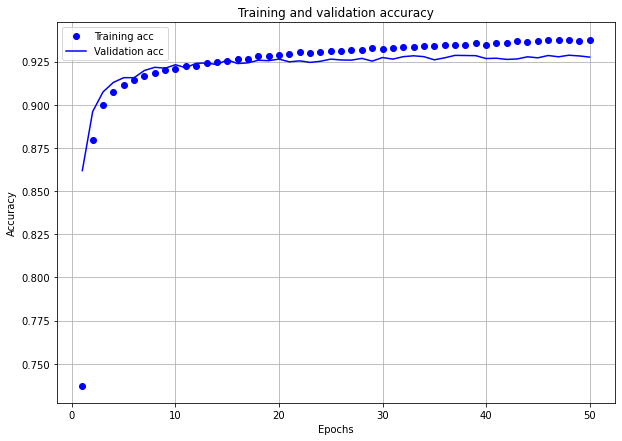

validation_acc: 0.9275833368301392


In [26]:
# Training und validation accuracy anzeigen
plt.figure(figsize=(10, 7))
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()
print('validation_acc:', val_acc[-1])

Die Netzwerkarchitektur bzw. das Design des Netzes ist noch nicht ideal. Aus Erfahrung weiss man, dass ein gutes Netz eine Validation Accuracy von über 0.98 erreichen kann und das in weniger als 20 Epochen.

**Aufgabe:** Ändern Sie Hyperparameter, so dass Sie diese Werte ebenfalls erreichen.  
**Wichtig:** Sie müssen `network = models.Sequential()` und die darauffolgenden Befehle für jeden Ihrer Versuch erneut ausführen, ansonsten werden die Gewichte und Schwellwerte ihres Netzes nicht neu initialisiert und Sie erhalten verwirrende Resultate. Sobald Sie in der Grafik sehen, dass Sie in einer Epoche einen zufriedenstellenden Accuracy-Wert erhalten haben, gehen Sie wie folgt vor: Bestimmen Sie die Anzahl Trainingsepochen bei welcher der Übergang zwischen Under- und Overfitting stattfindet. Führen Sie das Training erneut aus, reduzieren Sie jedoch die Anzahl Trainingsepochen auf den vorher bestimmten Wert. Anschliessend können Sie eine abschliessende Evaluation der Klassifikationsperformance vornehmen.

### Anzeige von einzelnen Bildern mit der Ergebnisvorhersage
Für ein einzelnes Bild kann eine Vorhersage wie folgt gemacht werden:

In [27]:
index = 2
prediction = network.predict(np.array([train_images[index]]))
np.argmax(prediction)

4

Wir zeigen uns das Bild und die zugehörigen Voraussagen an:

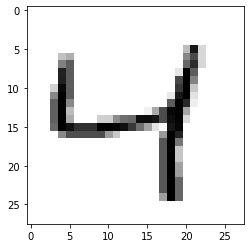

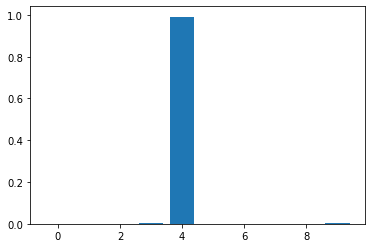

Most probable outcome: 4


In [28]:
show_image(train_images[index])
plt.bar(np.arange(10),prediction[0])
plt.show()
print('Most probable outcome:', np.argmax(prediction))

## 6. <a name="Evaluation"></a>Abschliessende Evaluation der Performance auf dem Test-Set
Wir führen die Bewertung des eingelernten Neuronalen Netzes anhand des Test-Datensatzes durch.  
Diese Test-Daten hat das Neuronale Netz bislang noch nie gesehen, sie sind also wirklich geeignet, um zu überprüfen, ob die gewonnene Lösung des Klassifizierungsproblems (Ziffernerkennung) auch auf unbekannte Daten verallgemeinert werden kann.

Wenn die Genauigkeit (Accuracy) der Ziffernerkennung hoch ist, dann hat unser Training funktioniert.

In [29]:
test_loss, test_acc = network.evaluate(test_images, test_labels_cat)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.9310
test_loss: 0.2558026909828186
test_acc: 0.9309999942779541


Die Genauigkeit beträgt ca. 93%. Dies ist für viele Zwecke ausreichend. Höhere Genauigkeiten können erreicht werden, indem z.B. die Netzwerkarchitektur (d.h. das Modell), die Trainingsparameter (z.B. optimizer, loss-function, metric), oder auch das verwendete Datenmaterial weiter optimiert werden.

#### Lösung zur Aufgabe Hyperparameter

In [30]:
# Diese Zelle muss zuerst ausgeführt werden, bevor die Lösung angezeigt werden kann:
print('Frage: Welche Hyperparameter müssen geändert werden?')
Question('Puq%2C%5Cu%C2%84qx%C2%86mtx%2CCD%40%2Cu%7F%C2%80%2C%C2%82uqx%2Cs~%C4%82%7F%7Fq~%2Cmx%7F%2Cpuq%2CMz%C2%86mtx%2Cmz%2CUz%7C%C2%81%C2%809Zq%C2%81~%7Bzqz%2C4%3D%3C5%3A%16R%7Bxsxuot%2Cy%C2%81%7F%7F%2Cpq~%2CT%C2%85%7Cq~%7Cm~myq%C2%80q~%2CMz%C2%86mtx%2CQuzsmzs%7Fzq%C2%81~%7Bzqz%2Cuz%2Cpq~%2CPqruzu%C2%80u%7Bz%16pq~%2Cq~%7F%C2%80qz%2C_otuot%C2%80%2Cpq%7F%2Czq%C2%81~%7Bzmxqz%2CZq%C2%80%C2%86q%7F%2Cmzsq%7Cm%7F%7F%C2%80%2C%C2%83q~pqz%2C4%C2%86%3AN%3A%2C%C2%82%7Bz%2C%3D%3C%2Cm%C2%81r%2CA%3D%3E5F%16%16zq%C2%80%C2%83%7B~w%3Ampp4xm%C2%85q~%7F%3APqz%7Fq4A%3D%3E8%2Cmo%C2%80u%C2%82m%C2%80u%7BzI3~qx%C2%8138%2Cuz%7C%C2%81%C2%80k%7Ftm%7CqI4z%C2%81yk%7Cu%C2%84qx%7F8555')

Frage: Welche Hyperparameter müssen geändert werden?


Button(description='Antwort anzeigen', style=ButtonStyle())